# Sourcing & Analyzing Time Series Data

## This script contains the following:¶
#### 1. Importing your libraries and data
#### 2. Cleaning, wrangling, subsetting
#### 3. Plot the data
#### 4. Time series analysis - decomposition
#### 5. Testing for stationarity
#### 6. Data not stationary - differencing - repeat the Dickey-Fuller test

#### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Created charts are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
# Creating a path for faster import and export
path=r"C:\Users\olilo\OneDrive\Dokumente\CF\Data Analytics Immersion_Week 14-15\2023-10-09 Airbnb Amsterdam"

In [4]:
# Set the color palette to "RuBu"
sns.set_palette("RdBu")

In [5]:
# Import datafarme
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'listings.csv'), index_col = False)

In [6]:
# Output check
df.shape

(8386, 18)

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Xsjong,NaN,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2023-08-19,2.30,2,272,26,0363 D4AD DCF3 E72A 56A2
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,J & R,NaN,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,2023-08-16,0.64,1,16,6,0363 7A50 18E7 51D1 B7F9
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,Nicole,NaN,Westerpark,52.37824,4.86826,Private room,109,2,341,2023-08-24,2.73,3,29,43,036396BE30827DDB9575
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,Danielle,NaN,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,2019-01-02,0.11,1,0,0,0363 D807 AD6C 499A F871
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,Marcel,NaN,Centrum-West,52.37641,4.88303,Private room,150,1,699,2023-09-01,6.62,2,196,110,0363 8C61 E9B9 5582 913E


#### 2. Cleaning, wrangling, subsetting

In [8]:
# Dataframe listing cleaning
df_time = df[['id',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month',
       'availability_365', 'number_of_reviews_ltm']]

In [9]:
#  Rename some columns in the imported dataframe to make it easier to type out syntax
df_time.rename(columns = {'number_of_reviews' : 'Reviews number', 'price':'Price', 'availability_365': 'Availability in days','minimum_nights' : 'Min. Nights', 'reviews_per_month': 'Reviews per Month', 'number_of_reviews_ltm': 'Reviews in 12 Months','room_type': 'Property for rent','neighbourhood':'Neighbourhood', 'last_review':'Last review date'}, inplace = True)

In [10]:
df_time.head()

,id,Neighbourhood,latitude,longitude,Property for rent,Price,Min. Nights,Reviews number,Last review date,Reviews per Month,Availability in days,Reviews in 12 Months
0,761411,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2023-08-19,2.30,272,26
1,768274,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,2023-08-16,0.64,16,6
2,768737,Westerpark,52.37824,4.86826,Private room,109,2,341,2023-08-24,2.73,29,43
3,771217,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,2019-01-02,0.11,0,0
4,771343,Centrum-West,52.37641,4.88303,Private room,150,1,699,2023-09-01,6.62,196,110


In [11]:
# Check for missing values
df_time.isnull().sum()

id                        0
Neighbourhood             0
latitude                  0
longitude                 0
Property for rent         0
Price                     0
Min. Nights               0
Reviews number            0
Last review date        830
Reviews per Month       830
Availability in days      0
Reviews in 12 Months      0
dtype: int64

In [12]:
# Drop rows with null values in the 'Reviews per Month' and 'Last review date' columns
df_new= df_time.dropna(subset=['Reviews per Month', 'Last review date'])

In [13]:
# Convert the 'Last review date' column to a datetimelike type
df_new['Last review date'] = pd.to_datetime(df_new['Last review date'])

# Group the data by the 'Last review date' and count the number of rows in each group
df_1 = df_new.groupby(df_new['Last review date'].dt.date)['Last review date'].count()

In [14]:
# Output check
df_1.isnull().sum()

0

In [15]:
# Duplicates check
dups = df_1.duplicated()

In [16]:
dups.shape # No dups

(1014,)

In [17]:
df_1.head()

Last review date
2013-08-19    1
2014-01-04    1
2015-01-03    1
2015-02-08    1
2015-07-08    1
Name: Last review date, dtype: int64

#### 3. Plot the data

In [18]:
#avg duration trip on day
avg = df_new.groupby('Last review date')['Reviews per Month'].mean()

In [19]:
result = pd.DataFrame({'date': df_1.index, 'reviews_count': df_1.values, 'avg_reviews': avg.values})

In [20]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1014 non-null   object 
 1   reviews_count  1014 non-null   int64  
 2   avg_reviews    1014 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.9+ KB


In [21]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,reviews_count,avg_reviews
datetime,,
2013-08-19,1,0.10
2014-01-04,1,0.02
2015-01-03,1,0.01
2015-02-08,1,0.01
2015-07-08,1,0.09


In [22]:
# Reset index so that you can use the "Date" column as a filter
result_2 = result.reset_index()
#Output
result_2.head()

,datetime,reviews_count,avg_reviews
0,2013-08-19,1,0.10
1,2014-01-04,1,0.02
2,2015-01-03,1,0.01
3,2015-02-08,1,0.01
4,2015-07-08,1,0.09


In [23]:
result_3 = result_2[['datetime','reviews_count']]
#Output
result_3.head()

,datetime,reviews_count
0,2013-08-19,1
1,2014-01-04,1
2,2015-01-03,1
3,2015-02-08,1
4,2015-07-08,1


In [24]:
# Reset index so that you can use the "Date" column as a filter
result_3 = result.reset_index()
#Output
result_3.head()

,datetime,reviews_count,avg_reviews
0,2013-08-19,1,0.10
1,2014-01-04,1,0.02
2,2015-01-03,1,0.01
3,2015-02-08,1,0.01
4,2015-07-08,1,0.09


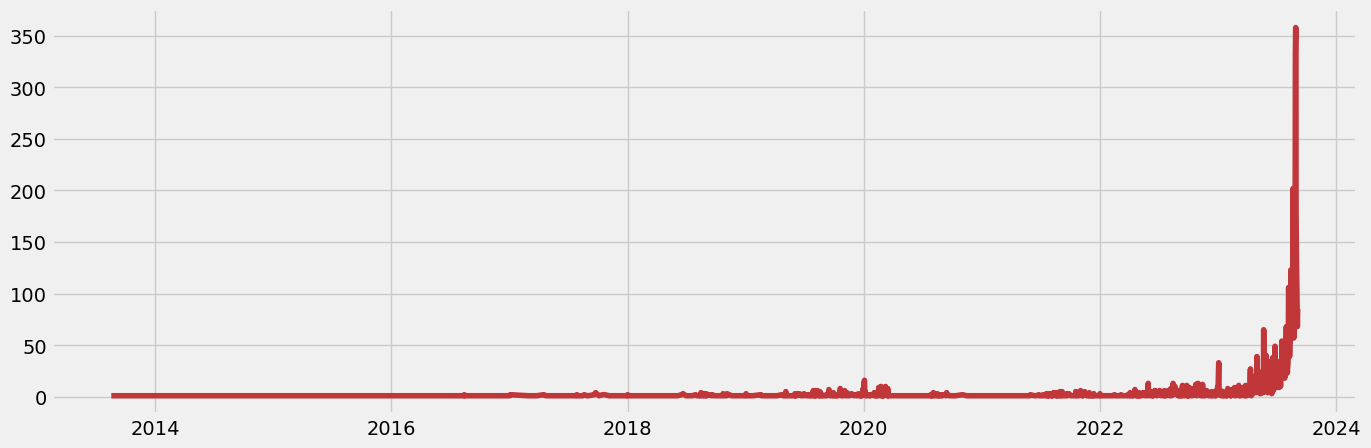

In [25]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_1)

In [26]:
#Output print
df_1

Last review date
2013-08-19      1
2014-01-04      1
2015-01-03      1
2015-02-08      1
2015-07-08      1
             ... 
2023-08-30    141
2023-08-31    118
2023-09-01    102
2023-09-02     68
2023-09-03     85
Name: Last review date, Length: 1014, dtype: int64

#### 4. Time series analysis - decomposition

In [27]:
# Control
result

,reviews_count,avg_reviews
datetime,,
2013-08-19,1,0.100000
2014-01-04,1,0.020000
2015-01-03,1,0.010000
2015-02-08,1,0.010000
2015-07-08,1,0.090000
...,...,...
2023-08-30,141,2.717872
2023-08-31,118,3.449407
2023-09-01,102,3.643333


In [28]:
# Drop the avg column
column_to_drop = 'avg_reviews'

In [29]:
result = result.drop(column_to_drop, axis=1)
# Output check
result

,reviews_count
datetime,
2013-08-19,1
2014-01-04,1
2015-01-03,1
2015-02-08,1
2015-07-08,1
...,...
2023-08-30,141
2023-08-31,118
2023-09-01,102


In [30]:
# Reset index so that you can use the "Date" column as a filter
result_1 = result.reset_index()
# Print
print(result_1)

       datetime  reviews_count
0    2013-08-19              1
1    2014-01-04              1
2    2015-01-03              1
3    2015-02-08              1
4    2015-07-08              1
...         ...            ...
1009 2023-08-30            141
1010 2023-08-31            118
1011 2023-09-01            102
1012 2023-09-02             68
1013 2023-09-03             85

[1014 rows x 2 columns]


In [32]:
time_series = result_1['datetime']

In [33]:
# Convert the 'datetime' column to datetime values
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [34]:
result_1.set_index('datetime', inplace=True)

In [38]:
time_series = result_1['reviews_count']

In [41]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive', period=12)

In [42]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [44]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

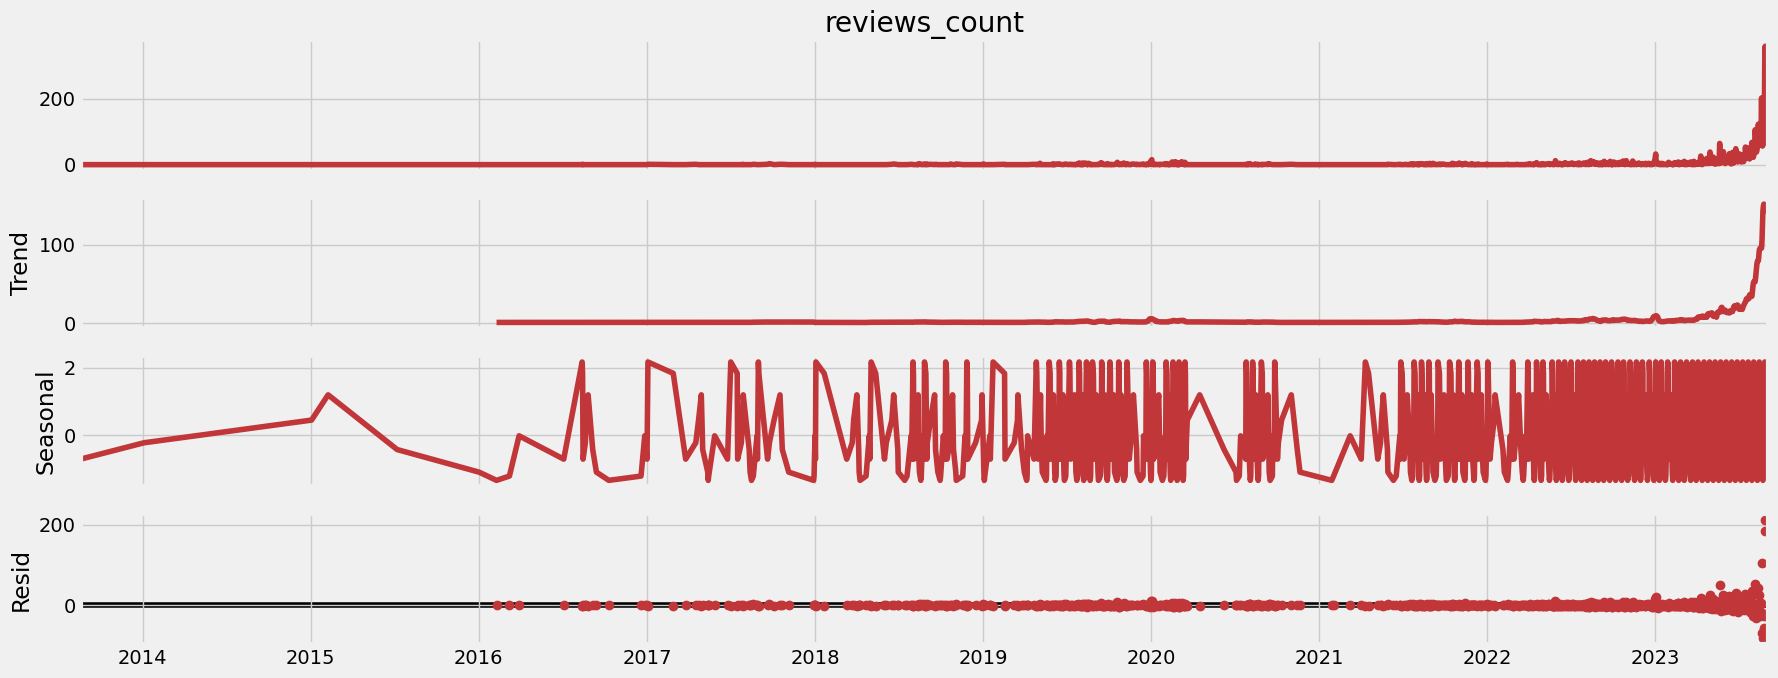

In [45]:
# Plot the separate components
decomposition.plot()
plt.show()

In [46]:
# Output check
result_1

,reviews_count
datetime,
2013-08-19,1
2014-01-04,1
2015-01-03,1
2015-02-08,1
2015-07-08,1
...,...
2023-08-30,141
2023-08-31,118
2023-09-01,102


##### Observations
* trend: long stabel, line trend than from 2023 we have a positive trend growth
* seasonality: no apparent seasonality
* noise: noise rist from 2023 to see

#### 5. Testing for stationarity

In [48]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['reviews_count'])

Dickey-Fuller Stationarity test:
Test Statistic                   9.753136
p-value                          1.000000
Number of Lags Used             21.000000
Number of Observations Used    992.000000
Critical Value (1%)             -3.436959
Critical Value (5%)             -2.864458
Critical Value (10%)            -2.568324
dtype: float64


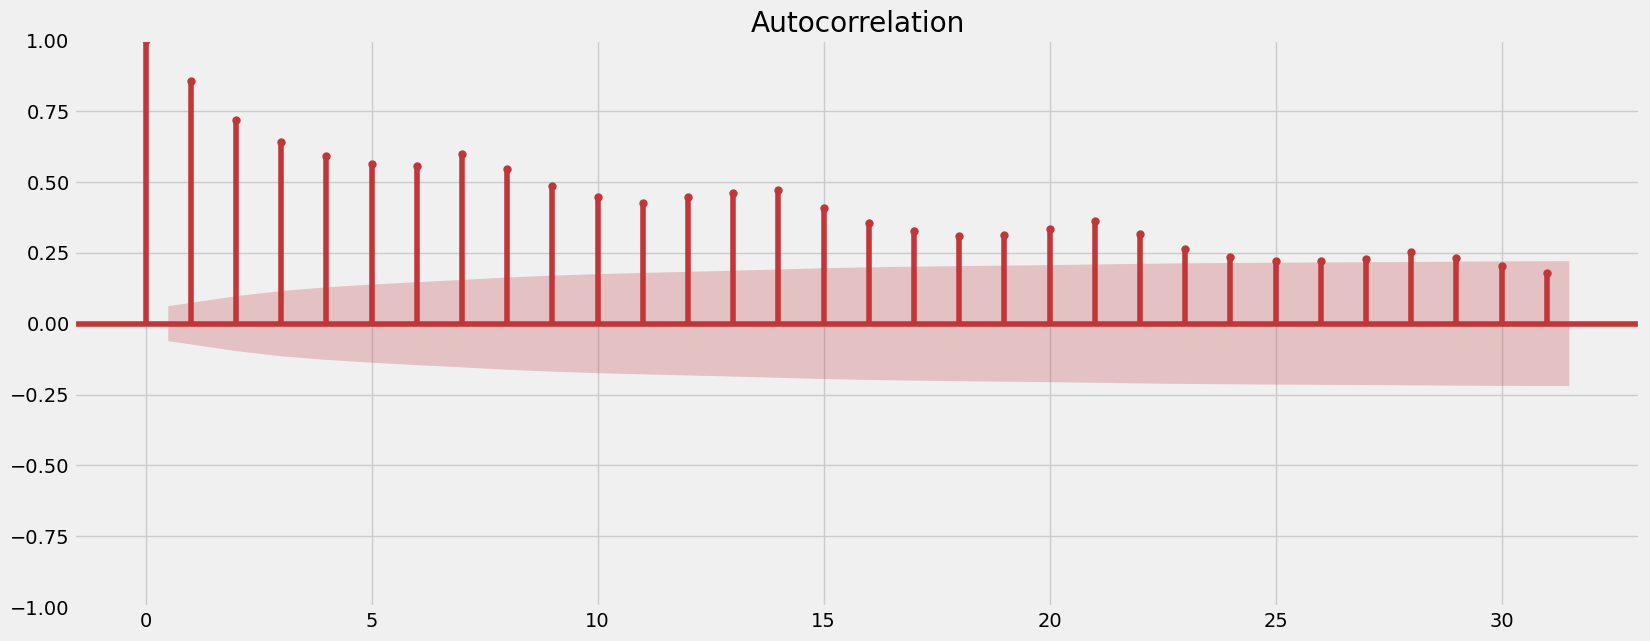

In [50]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

##### Results

In your case, the test statistic is 9.753136 and the p-value is 1.000000. This means that the p-value is greater than the significance level of 0.05, so the null hypothesis is not rejected. Therefore, we cannot conclude that the time series is non-stationary.

#### 6. Data not stationary - differencing - repeat the Dickey-Fuller test

In [51]:
# Perform differencing
df_di = result_1 - result_1.shift(1)

In [52]:
# Remove missing values from differencing so dickey-fuller test can be done again
df_di.dropna(inplace = True)

In [53]:
# Output check
df_di.head()

,reviews_count
datetime,
2014-01-04,0.0
2015-01-03,0.0
2015-02-08,0.0
2015-07-08,0.0
2016-01-02,0.0


In [54]:
df_di.columns

Index(['reviews_count'], dtype='object')

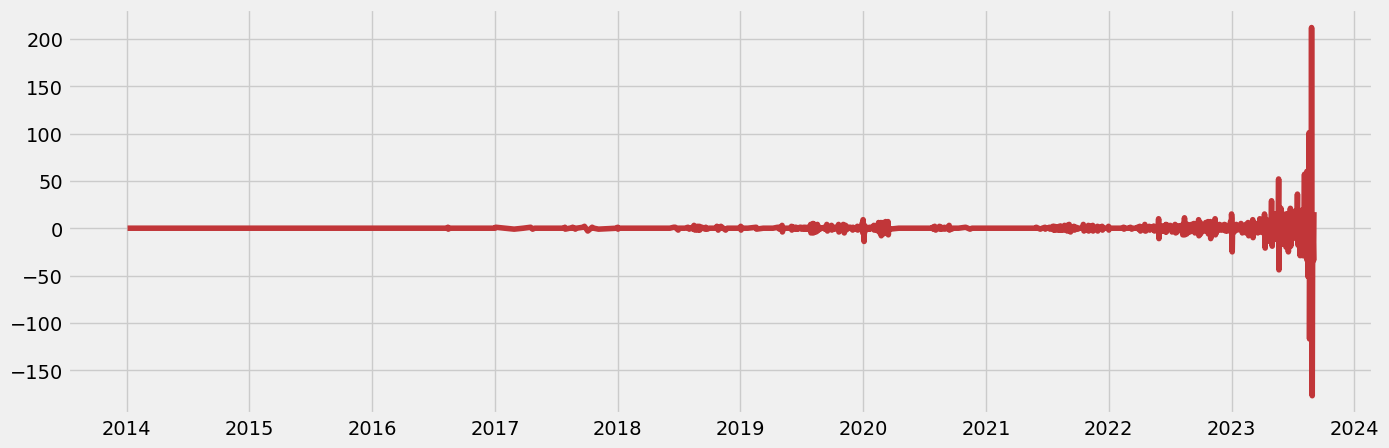

In [55]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_di)

In [56]:
#run dickey-fuller test again
#can call dickey_fuller as it was defined previously
dickey_fuller(df_di)

Dickey-Fuller Stationarity test:
Test Statistic                   1.934102
p-value                          0.998581
Number of Lags Used             22.000000
Number of Observations Used    990.000000
Critical Value (1%)             -3.436973
Critical Value (5%)             -2.864464
Critical Value (10%)            -2.568327
dtype: float64


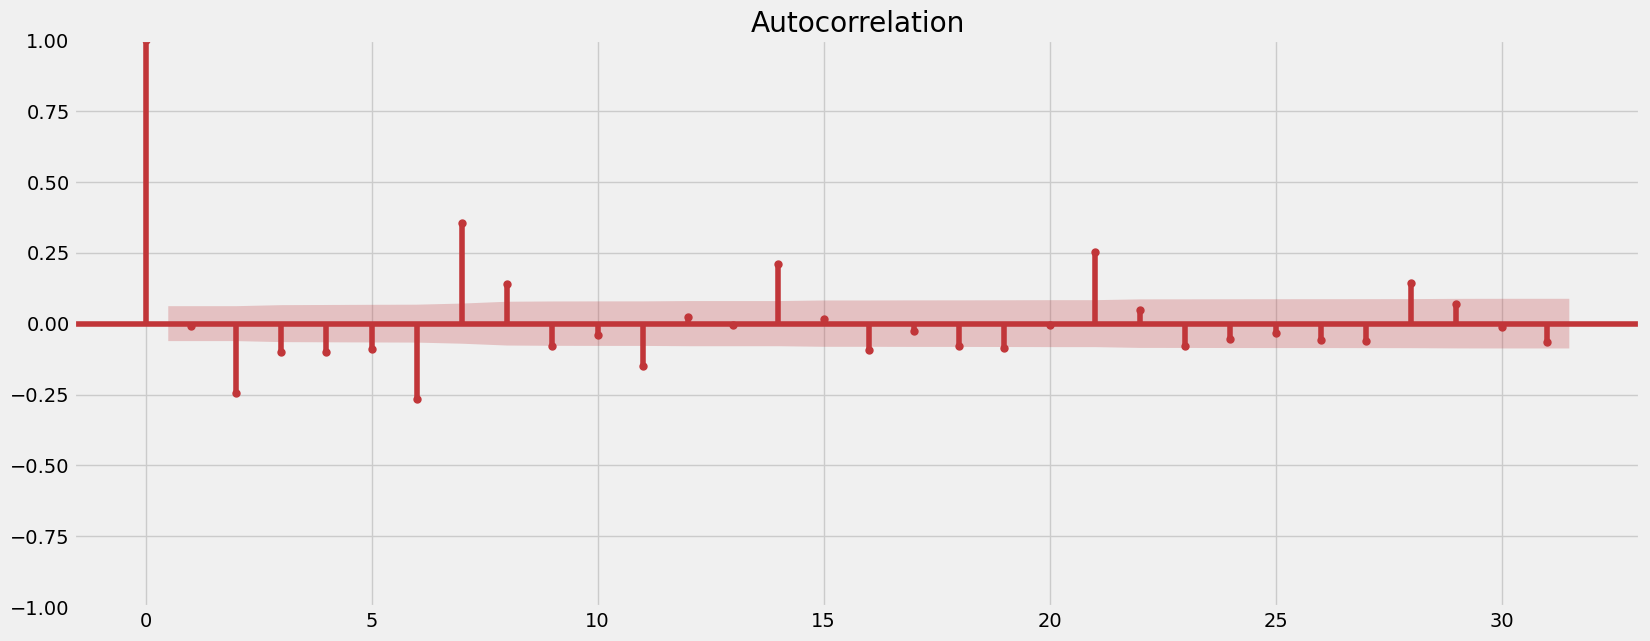

In [58]:
#Create a plot of autocorrelations

# Here, you import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_di)
plt.show()

#### Results
Still after try to change the Output this time, the test statistic is  1.934102 and the p-value is 0.998581. This means that the p-value is greater than the significance level of 0.05, so the null hypothesis is not rejected. So again this time series is non-stationary.

In [59]:
# saving to csv
result_1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_time.csv'))